<div class="alert alert-block alert-info">


# Kickstarter Project Projection

## Business Application of Machine Learning
    

<div>

In [1]:
#pip install altair

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
# Load the dataset
data = pd.read_csv('ks-projects-201801.csv')

# Data Overview

In [4]:
# Display the first few rows of the dataframe to verify it's loaded correctly
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
# Get the shape of the DataFrame
data.shape

(378661, 15)

In [6]:
# Display information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [7]:
# Calculate the number of null values in each column
data.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [8]:
# Check for duplicate entries in the DataFrame
data.duplicated().sum()

0

In [9]:
# Generate descriptive statistics
data.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [10]:
# Generate descriptive statistics for all columns
data.describe(include='all')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,378657,378661,378661,378661,378661,3.786610e+05,378661,3.786610e+05,378661,378661.000000,378661,3.748640e+05,3.786610e+05,3.786610e+05
unique,NaN,375764,159,15,14,3164,NaN,378089,NaN,6,NaN,23,NaN,NaN,NaN
top,NaN,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,NaN,1970-01-01 01:00:00,NaN,failed,NaN,US,NaN,NaN,NaN
freq,NaN,41,22314,63585,295365,705,NaN,7,NaN,197719,NaN,292627,NaN,NaN,NaN
mean,1.074731e+09,NaN,NaN,NaN,NaN,NaN,4.908079e+04,NaN,9.682979e+03,NaN,105.617476,NaN,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,NaN,NaN,NaN,NaN,NaN,1.183391e+06,NaN,9.563601e+04,NaN,907.185035,NaN,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,NaN,NaN,NaN,NaN,NaN,1.000000e-02,NaN,0.000000e+00,NaN,0.000000,NaN,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,NaN,NaN,NaN,NaN,NaN,2.000000e+03,NaN,3.000000e+01,NaN,2.000000,NaN,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,NaN,NaN,NaN,NaN,NaN,5.200000e+03,NaN,6.200000e+02,NaN,12.000000,NaN,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,NaN,NaN,NaN,NaN,NaN,1.600000e+04,NaN,4.076000e+03,NaN,56.000000,NaN,3.034090e+03,4.050000e+03,1.550000e+04


In [11]:
# Check the unique categories in the 'state' column and their counts
data['state'].value_counts()

state
failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: count, dtype: int64

Since we are building a machine learning model to predict the success of Kickstarter projects, it is crucial to include data that is relevant to the model's purpose. In this case, we are only interested in projects that have a definitive outcome: either they succeeded, failed, or were canceled. Projects that are currently live, suspended, or undefined do not have a final outcome and thus cannot be used for training a predictive model aimed at forecasting project success. By filtering out these incomplete entries, we ensure that the model learns from clear, historical examples of success and failure, which can improve its predictive accuracy on new, complete project data.

In [12]:
# Filter the dataframe for projects that are either successful, failed, or canceled
df = data[data['state'].isin(['successful', 'failed', 'canceled'])]

# Now you can check the unique categories in the 'state' column of the filtered dataframe
df['state'].value_counts()

state
failed        197719
successful    133956
canceled       38779
Name: count, dtype: int64

The `usd_pledged` column is excluded due to incomplete data, thereby enhancing the integrity of our dataset. We retain the `usd_pledged_real` column because it represents a standardized and consistent measure of financial support in USD across all projects, accounting for currency fluctuations and providing a uniform basis for comparison.

In [13]:
# Drop the 'usd pledged' column from the DataFrame
df = df.drop('usd pledged', axis=1)

Similar to our approach with the `usd_pledged_real` column, we also choose to keep the `usd_goal_real` column for its consistency in representing project goals in USD. This ensures that our analysis is not skewed by variable exchange rates or different monetary standards, allowing for a direct and fair comparison of project goals across the diverse, international spectrum of Kickstarter campaigns.

In [14]:
# Drop the 'goal' column from the DataFrame
df = df.drop('goal', axis=1)

In [15]:
df

,ID,name,category,main_category,currency,deadline,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,2011-06-22 03:35:14,155.0,failed,5,US,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,2010-07-01 19:40:30,20.0,failed,1,US,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,2016-01-13 18:13:53,200.0,failed,6,US,200.0,15000.00


# Feature Engineering

In [16]:
# Convert the 'launched' and 'deadline' columns to datetime objects
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])

In [17]:
# Calculate the period between deadline and launch date
df['period'] = (df['deadline'] - df['launched']).dt.days

In [18]:
# Extract day of the week launched
df['day_of_week_launched'] = df['launched'].dt.dayofweek

In [19]:
#Create a new column 'usd_pledged_per_backer'
df['usd_pledged_per_backer'] = df['usd_pledged_real'] / df['backers']
df['usd_pledged_per_backer'] = df['usd_pledged_per_backer'].round(1)

In [20]:
df['Hour_of_the_day_launched']=df['launched'].dt.hour

In [21]:
df

,ID,name,category,main_category,currency,deadline,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,period,day_of_week_launched,usd_pledged_per_backer,Hour_of_the_day_launched
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95,58,1,NaN,12
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,59,5,161.4,4
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00,44,5,73.3,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00,29,5,1.0,3
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00,55,5,91.6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,50000.00,29,2,25.0,2
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,2011-06-22 03:35:14,155.0,failed,5,US,155.0,1500.00,26,2,31.0,3
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,2010-07-01 19:40:30,20.0,failed,1,US,20.0,15000.00,45,3,20.0,19
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,2016-01-13 18:13:53,200.0,failed,6,US,200.0,15000.00,30,2,33.3,18


# Data Preparation and Splitting

In [22]:
# Define features (X) and target variable (y)
X = df.drop(columns=['state'])  # Features (all columns except the target variable)
y = df['state']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (296363, 16) (296363,)
Testing set shape: (74091, 16) (74091,)


In [23]:
# Check class distribution in the training set
print("Training set class distribution:")
print(y_train.value_counts())

# Check class distribution in the testing set
print("\nTesting set class distribution:")
print(y_test.value_counts())

Training set class distribution:
state
failed        158238
successful    107105
canceled       31020
Name: count, dtype: int64

Testing set class distribution:
state
failed        39481
successful    26851
canceled       7759
Name: count, dtype: int64


# Explantory Data Analysis

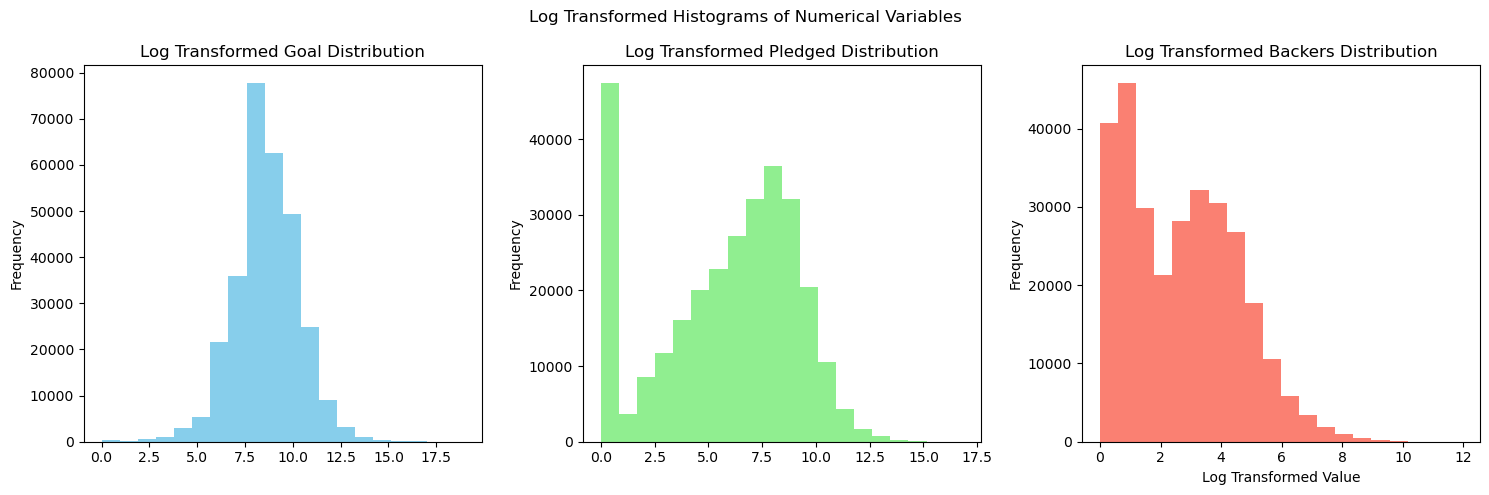

In [24]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Apply log transformation and plot histograms with a specified color
np.log1p(X_train['usd_goal_real']).plot(kind='hist', ax=axes[0], bins=20, title='Log Transformed Goal Distribution', color='skyblue')
np.log1p(X_train['usd_pledged_real']).plot(kind='hist', ax=axes[1], bins=20, title='Log Transformed Pledged Distribution', color='lightgreen')
np.log1p(X_train['backers']).plot(kind='hist', ax=axes[2], bins=20, title='Log Transformed Backers Distribution', color='salmon')

# Set common labels and title
plt.xlabel('Log Transformed Value')
plt.ylabel('Frequency')
plt.suptitle('Log Transformed Histograms of Numerical Variables')
plt.tight_layout()
plt.show()

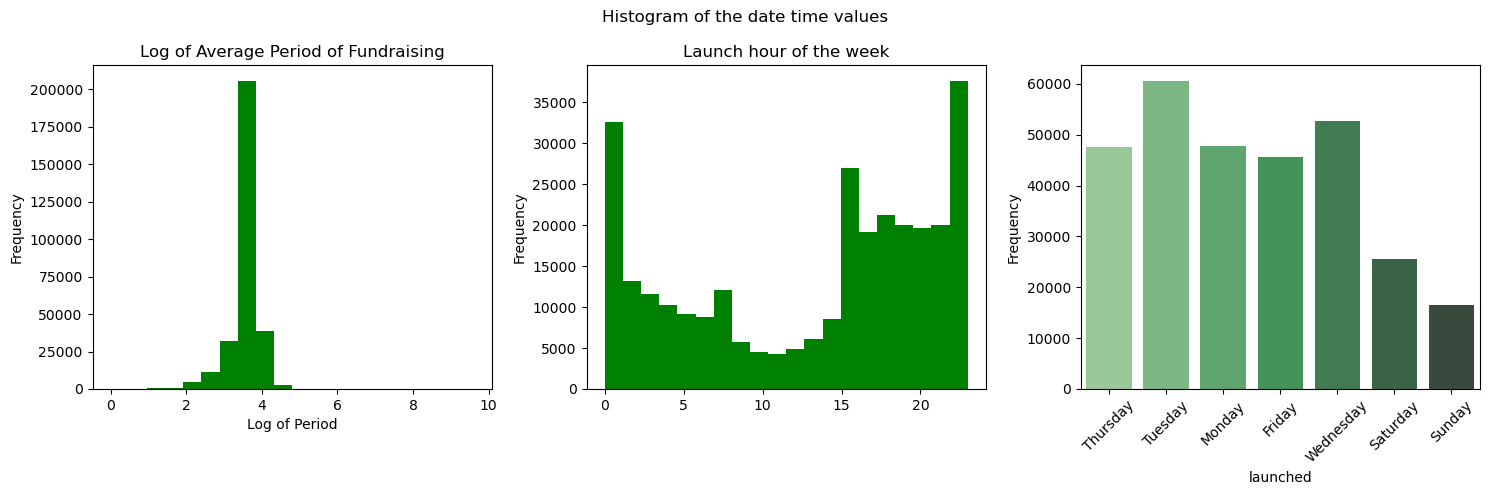

In [25]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Apply log transformation and plot histograms
# Use np.log1p to apply log(1+x) to avoid log(0) issues.
X_train['period'] = np.log1p(X_train['period'])  # Log transformation
X_train['period'].plot(kind='hist', ax=axes[0], bins=20, title='Log of Average Period of Fundraising', color='green')
axes[0].set_xlabel('Log of Period')  # Change x-axis label to indicate log scale

# Other plots remain unchanged
X_train['Hour_of_the_day_launched'].plot(kind='hist', ax=axes[1], bins=20, title='Launch hour of the week',color='green')
sns.countplot(x=X_train['launched'].dt.day_name(), ax=axes[2], palette="Greens_d")
axes[2].tick_params(axis='x', rotation=45)

# Set common labels and title
plt.ylabel('Frequency')
plt.suptitle('Histogram of the date time values')
plt.tight_layout()
plt.show()

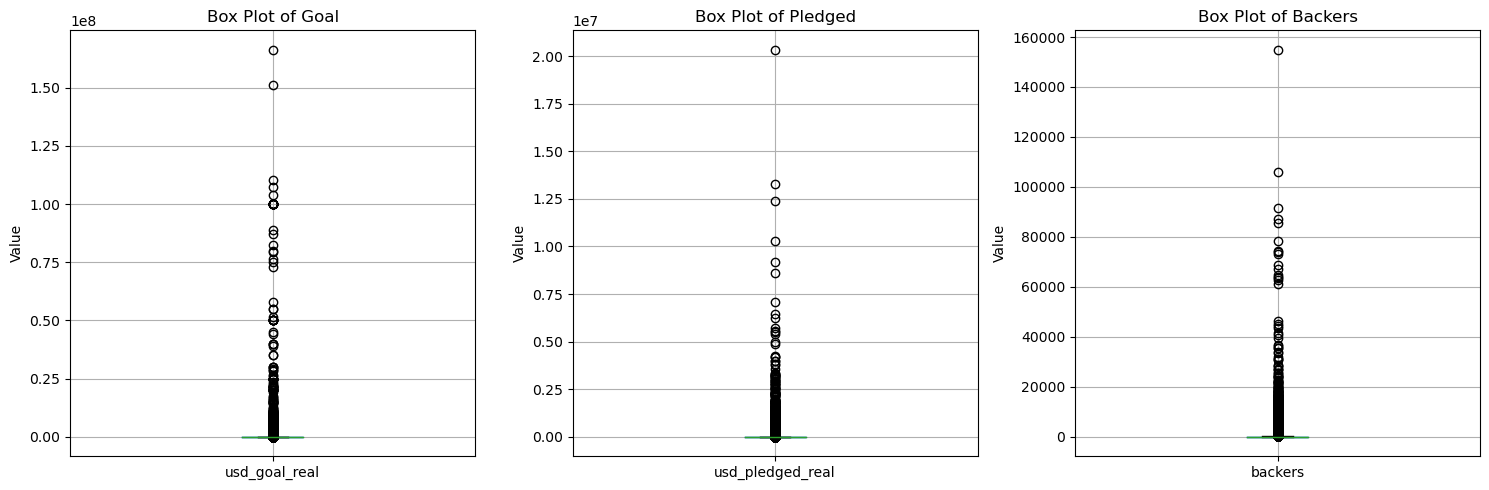

In [26]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot box plots for 'goal', 'pledged', and 'backers'
X_train.boxplot(column='usd_goal_real', ax=axes[0])
axes[0].set_title('Box Plot of Goal')

X_train.boxplot(column='usd_pledged_real', ax=axes[1])
axes[1].set_title('Box Plot of Pledged')

X_train.boxplot(column='backers', ax=axes[2])
axes[2].set_title('Box Plot of Backers')

# Set common labels
for ax in axes:
    ax.set_ylabel('Value')

# Adjust layout
plt.tight_layout()
plt.show()

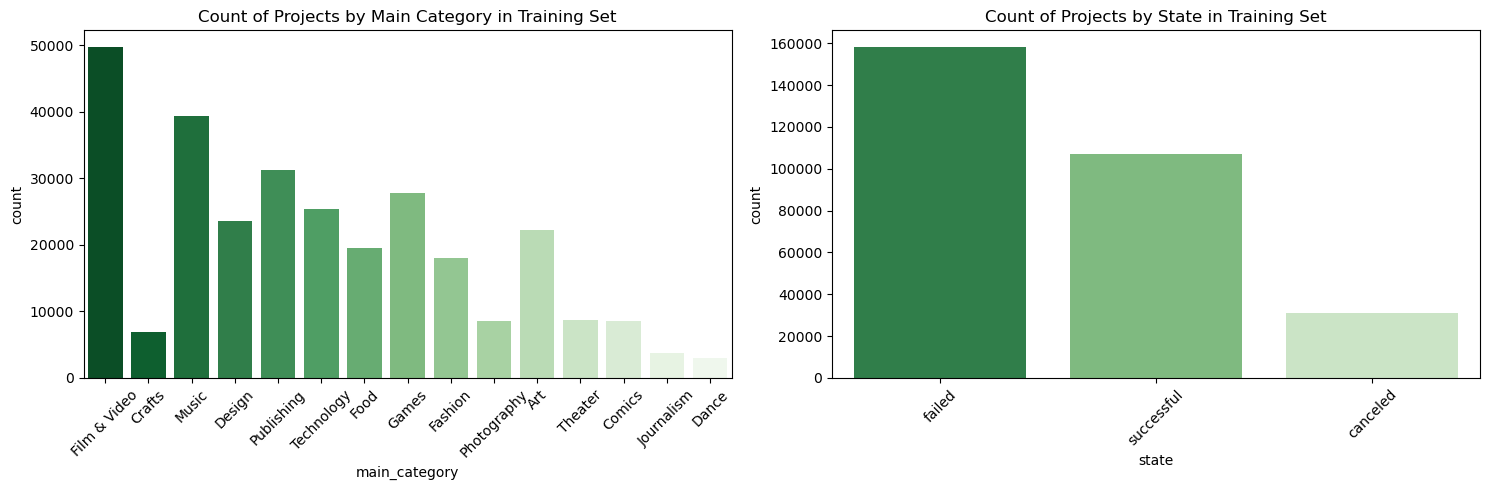

In [27]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Create a new DataFrame for plotting that includes the 'main_category' from X_train and 'state' from y_train
plot_data = X_train.copy()
plot_data['state'] = y_train

# Define a green color palette with as many colors as there are unique categories
unique_categories = plot_data['main_category'].nunique()
unique_states = plot_data['state'].nunique()
green_palette_category = sns.color_palette("Greens_r", n_colors=unique_categories)
green_palette_state = sns.color_palette("Greens_r", n_colors=unique_states)

# Plot count plots for 'main_category' with a green color palette
sns.countplot(data=plot_data, x='main_category', ax=axes[0], palette=green_palette_category)
axes[0].set_title('Count of Projects by Main Category in Training Set')
axes[0].tick_params(axis='x', rotation=45)

# Plot count plots for 'state' with a green color palette
sns.countplot(data=plot_data, x='state', ax=axes[1], palette=green_palette_state)
axes[1].set_title('Count of Projects by State in Training Set')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


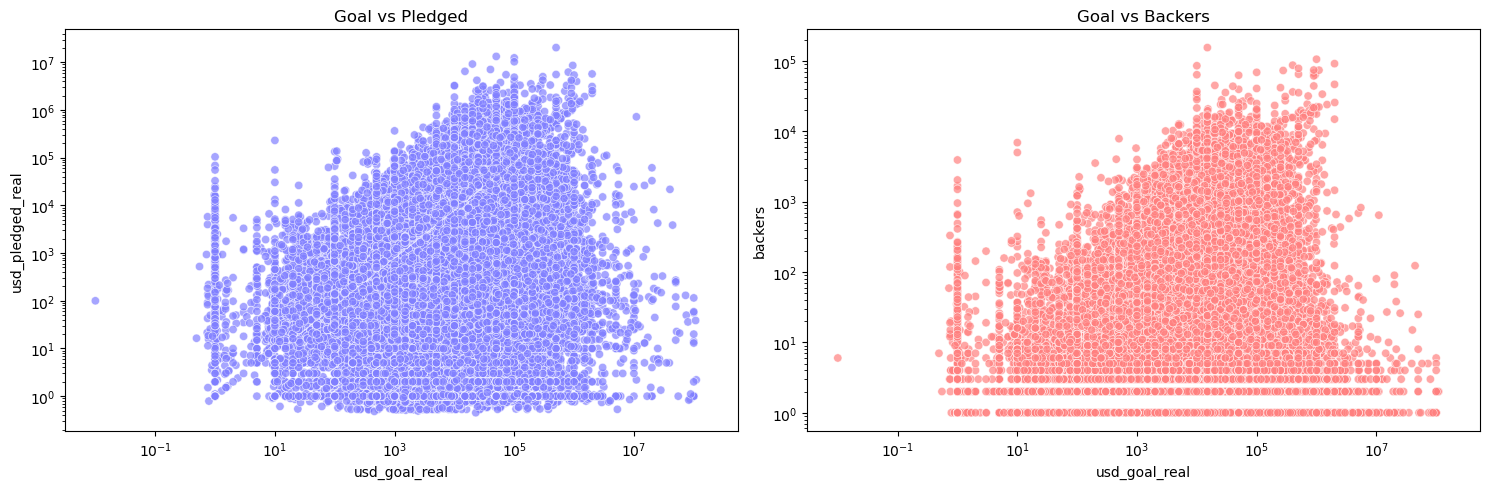

In [28]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot scatter plots for 'goal' vs 'pledged' and 'goal' vs 'backers' with Seaborn's scatterplot function
sns.scatterplot(data=X_train, x='usd_goal_real', y='usd_pledged_real', ax=axes[0], hue=1, alpha=0.7, palette='cool')
axes[0].set_title('Goal vs Pledged')

sns.scatterplot(data=X_train, x='usd_goal_real', y='backers', ax=axes[1], hue=1, alpha=0.7, palette='spring')
axes[1].set_title('Goal vs Backers')

# Remove the legend as it's not necessary
axes[0].legend_.remove()
axes[1].legend_.remove()

# Apply log transformation to both axes for both plots
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[1].set_xscale('log')
axes[1].set_yscale('log')

# Adjust layout
plt.tight_layout()
plt.show()

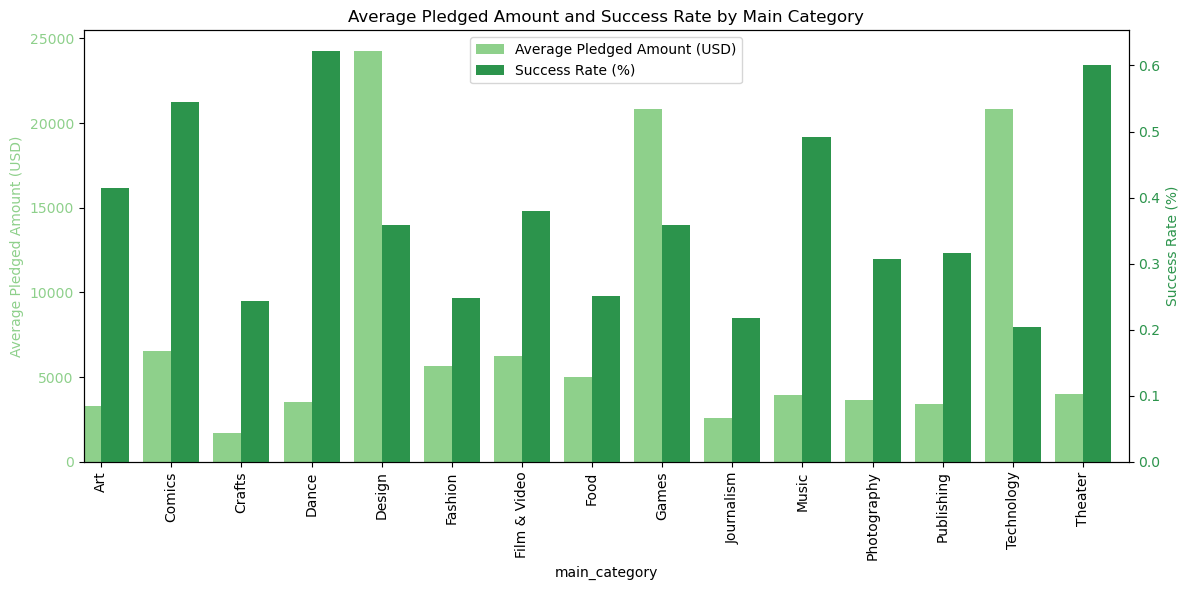

In [29]:
#### Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Define colors
color1 = sns.color_palette('Greens')[2]  # Lighter green shade for average pledged amount
color2 = sns.color_palette('Greens')[4]

avg_pledged = X_train.groupby('main_category')['usd_pledged_real'].mean()
success_rate = X_train.join(y_train).groupby('main_category')['state'].apply(lambda x: (x == 'successful').mean())

# Plot the average 'usd_pledged_real' as a bar plot
avg_pledged.plot(kind='bar', color=color1, ax=ax1, width=0.4, position=1, label='Average Pledged Amount (USD)')
ax1.set_ylabel('Average Pledged Amount (USD)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Create a secondary y-axis for the success rate
ax2 = ax1.twinx()
success_rate.plot(kind='bar', color=color2, ax=ax2, width=0.4, position=0, label='Success Rate (%)')
ax2.set_ylabel('Success Rate (%)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Set common labels and title
plt.title('Average Pledged Amount and Success Rate by Main Category')
plt.xlabel('Main Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Show plot
plt.tight_layout()
plt.show()

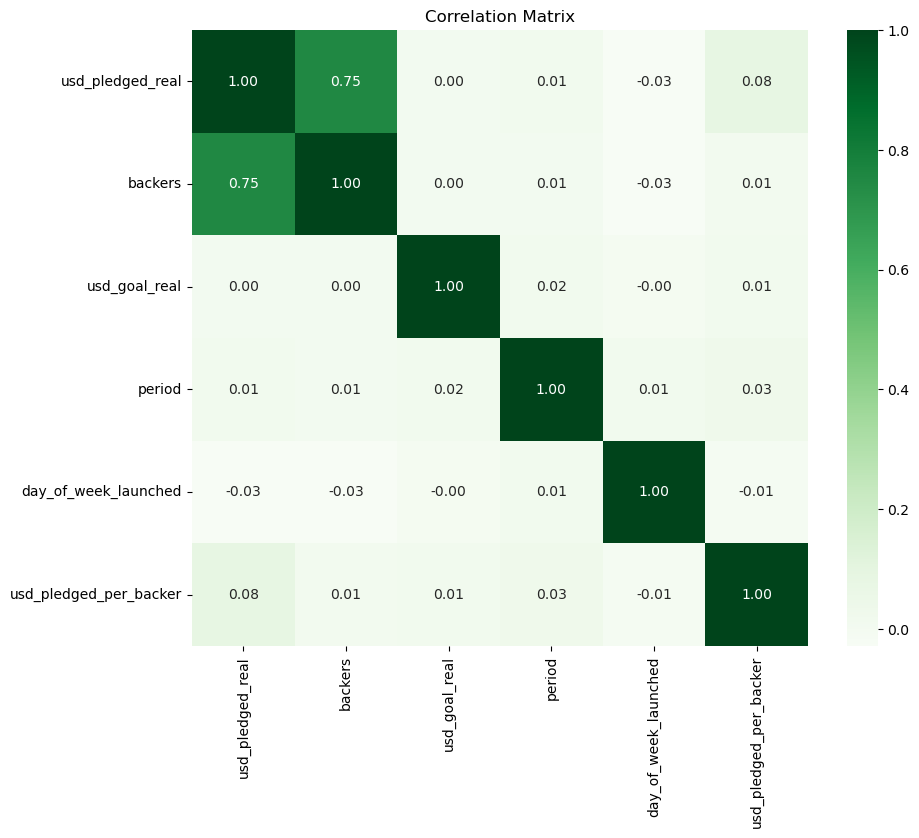

In [30]:
# Include additional numerical columns that you want to analyze
correlation_matrix = X_train[[
     'usd_pledged_real', 'backers', 'usd_goal_real', 
    'period', 'day_of_week_launched', 'usd_pledged_per_backer'
]].corr()

# Plot correlation matrix as a heatmap with shades of green color palette
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

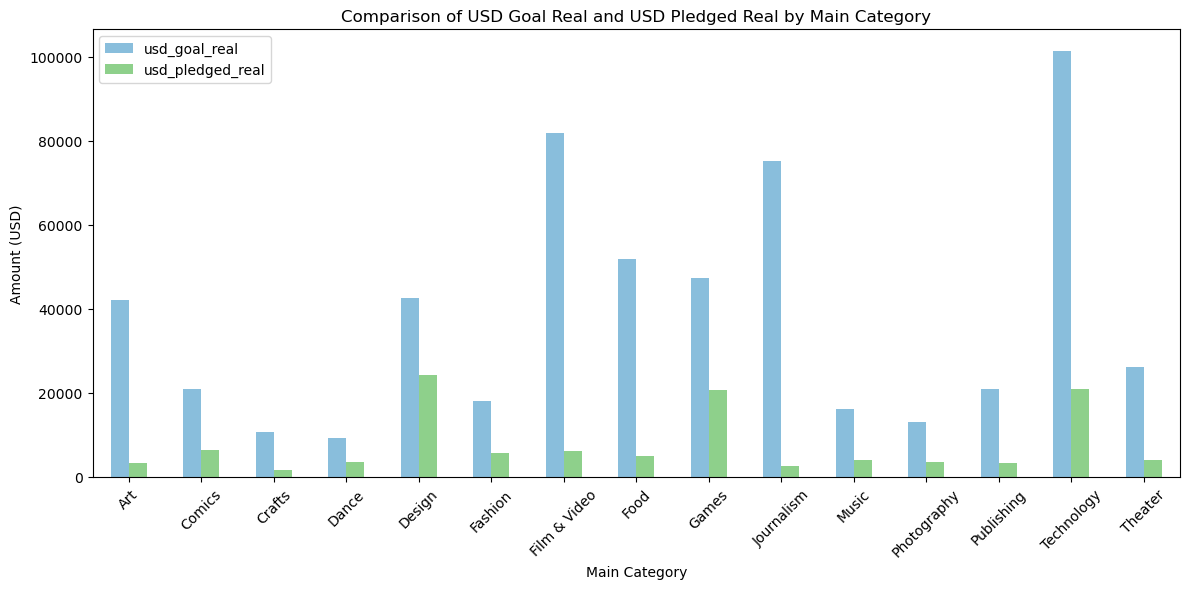

In [31]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Define colors
color1 = sns.color_palette('Blues')[2]  # Lighter blue shade for usd_goal_real
color2 = sns.color_palette('Greens')[2]  # Lighter green shade for usd_pledged_real

# Plot the usd_goal_real and usd_pledged_real for each main category
df_grouped = X_train.groupby('main_category').agg({'usd_goal_real': 'mean', 'usd_pledged_real': 'mean'}).reset_index()
df_grouped.plot(x='main_category', y=['usd_goal_real', 'usd_pledged_real'], kind='bar', ax=ax, color=[color1, color2])

# Set labels and title
ax.set_ylabel('Amount (USD)')
ax.set_xlabel('Main Category')
plt.title('Comparison of USD Goal Real and USD Pledged Real by Main Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


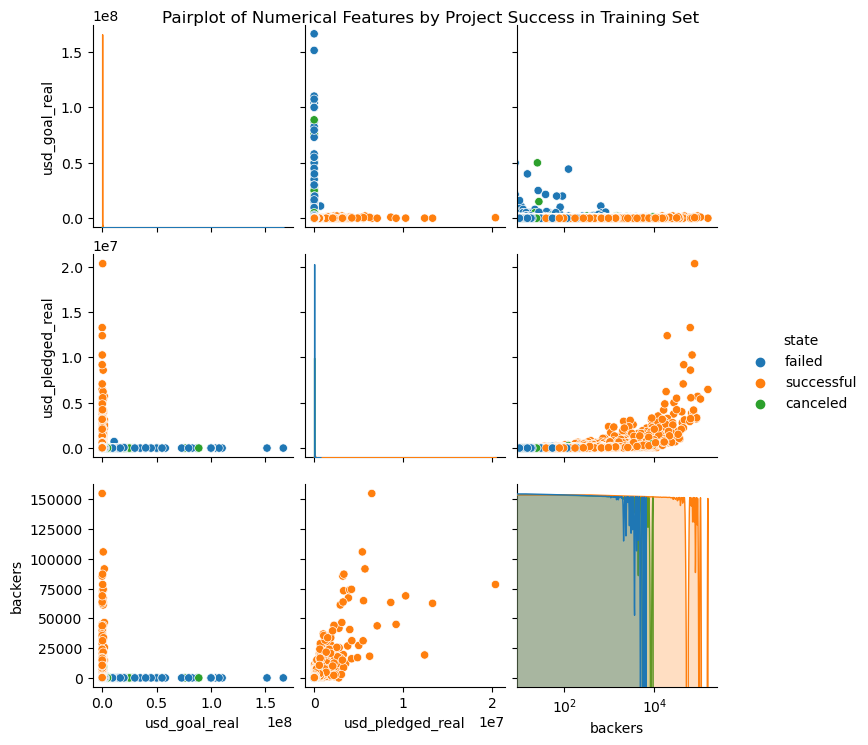

In [32]:
# Merge the training features with the target variable for visualization
train_data = X_train.copy()
train_data['state'] = y_train

# Explore relationship between numerical features and project success
sns.pairplot(train_data, hue='state', vars=['usd_goal_real', 'usd_pledged_real', 'backers'],diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Project Success in Training Set')
plt.xscale('log')
plt.yscale('log')
plt.show()

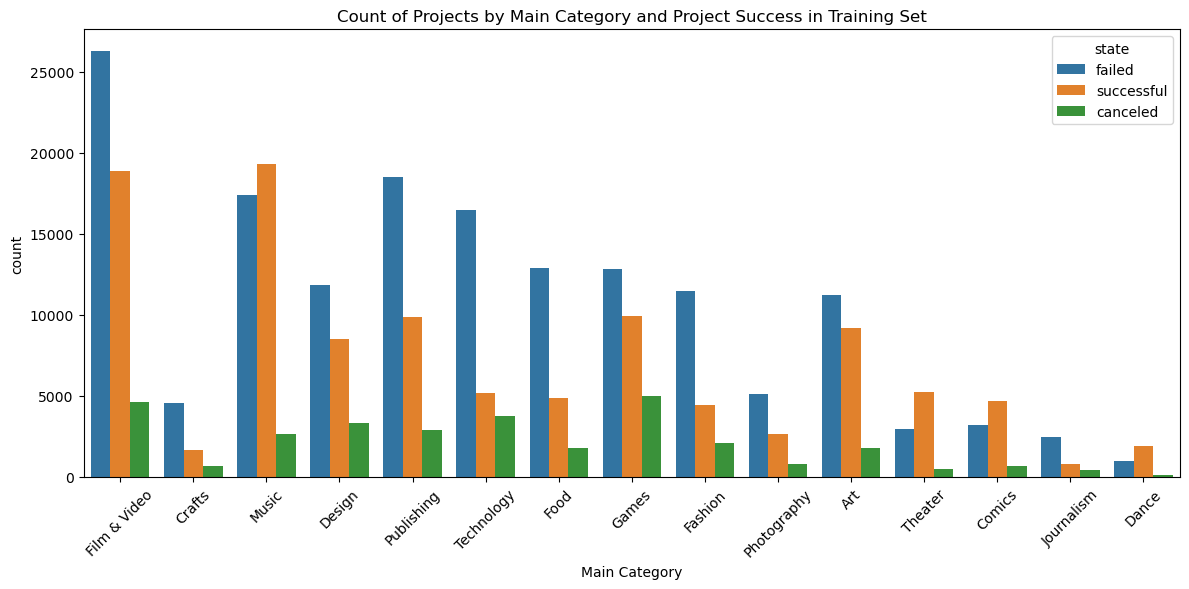

In [33]:
# Explore relationship between categorical features and project success
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='main_category', hue='state')
plt.title('Count of Projects by Main Category and Project Success in Training Set')
plt.xlabel('Main Category')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

#  Data Preprocessing

The columns being dropped serve various purposes that are not directly applicable to the predictive modeling process:

- `ID`: A unique identifier for each project, which is irrelevant for prediction as it does not contain any inherent predictive information.
- `Name`: The title of the project, which is text data requiring natural language processing to potentially use as a feature; often dropped initially to simplify the model.
- `Category`: This is more granular project classification data which might be redundant if you're using 'main_category' for modeling or could be encoded separately if needed.
- `Currency`: Since we have standardized goal and pledged amounts in USD, the original currency is not required.
- `Deadline` and `Launched`: The specific dates are less informative without feature engineering; typically, derived features such as campaign duration are used instead.
- `Pledged`: The amount pledged is an outcome of the campaign, not available at the launch; hence, it's not useful for predicting success at the start of the campaign.

By dropping these columns, we focus on variables that are more likely to have a direct relationship with the success of the projects and that are available at the time the prediction would be made.

In [34]:
X_train

,ID,name,category,main_category,currency,deadline,launched,pledged,backers,country,usd_pledged_real,usd_goal_real,period,day_of_week_launched,usd_pledged_per_backer,Hour_of_the_day_launched
219180,2116372703,The Lawrence Film Festival,Film & Video,Film & Video,USD,2013-04-08,2013-02-21 03:37:36,1.00,1,US,1.00,1000.00,3.828641,3,1.0,3
294176,567321945,"Mexico Creates: 3 Cabras, Cerámica Miniatura",Pottery,Crafts,MXN,2017-11-21,2017-10-19 16:58:55,13725.00,24,MX,737.27,1128.06,3.496508,3,30.7,16
75620,1385128118,Are you an enemy lover?,Music,Music,USD,2011-06-25,2011-05-26 21:21:36,699.22,15,US,699.22,20000.00,3.401197,3,46.6,21
19057,1096618549,Disc Golf Course - David's Eagle Project - Cen...,Architecture,Design,USD,2014-11-08,2014-09-09 16:57:00,11256.00,96,US,11256.00,9500.00,4.094345,1,117.2,16
153220,1778710737,Untitled Genre Submersion Film,Narrative Film,Film & Video,USD,2011-05-02,2011-03-15 19:57:40,2525.00,34,US,2525.00,2500.00,3.871201,1,74.3,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264858,417280631,Lizz Basinger Designs. Spring Summer 2013 Coll...,Fashion,Fashion,USD,2012-11-10,2012-10-11 22:28:23,2962.00,54,US,2962.00,7500.00,3.401197,3,54.9,22
373940,975545698,Help Ronstadt Generations record their second ...,Country & Folk,Music,USD,2012-06-18,2012-05-19 03:09:34,8445.00,77,US,8445.00,7500.00,3.401197,5,109.7,3
134829,1684318308,Jack the Ripper - A Primer Card Game,Tabletop Games,Games,USD,2016-09-01,2016-08-01 15:08:10,6723.02,172,US,6723.02,4800.00,3.433987,0,39.1,15
150076,1762694782,Candy Coven goes on new adventures!,Art,Art,SEK,2015-01-31,2015-01-07 23:26:15,1010.00,10,SE,122.26,484.20,3.178054,2,12.2,23


In [35]:
print(X_train.columns)

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'launched', 'pledged', 'backers', 'country', 'usd_pledged_real',
       'usd_goal_real', 'period', 'day_of_week_launched',
       'usd_pledged_per_backer', 'Hour_of_the_day_launched'],
      dtype='object')


In [36]:
drop_col=['ID','name','category','currency','deadline','launched','pledged']

In [37]:
X_train=X_train.drop(columns=drop_col,axis=1)
X_test=X_test.drop(columns=drop_col,axis=1)

In [38]:
X_train

,main_category,backers,country,usd_pledged_real,usd_goal_real,period,day_of_week_launched,usd_pledged_per_backer,Hour_of_the_day_launched
219180,Film & Video,1,US,1.00,1000.00,3.828641,3,1.0,3
294176,Crafts,24,MX,737.27,1128.06,3.496508,3,30.7,16
75620,Music,15,US,699.22,20000.00,3.401197,3,46.6,21
19057,Design,96,US,11256.00,9500.00,4.094345,1,117.2,16
153220,Film & Video,34,US,2525.00,2500.00,3.871201,1,74.3,19
...,...,...,...,...,...,...,...,...,...
264858,Fashion,54,US,2962.00,7500.00,3.401197,3,54.9,22
373940,Music,77,US,8445.00,7500.00,3.401197,5,109.7,3
134829,Games,172,US,6723.02,4800.00,3.433987,0,39.1,15
150076,Art,10,SE,122.26,484.20,3.178054,2,12.2,23


In [39]:
# Check for NaN values in X_train
nan_counts = X_train.isnull().sum()

# Print the counts of NaN values per column
print(nan_counts)

main_category                   0
backers                         0
country                         0
usd_pledged_real                0
usd_goal_real                   0
period                          0
day_of_week_launched            0
usd_pledged_per_backer      40573
Hour_of_the_day_launched        0
dtype: int64


In [81]:
# Replace inf/-inf with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [41]:
# For numeric features
numeric_features = X_train.select_dtypes('number').columns.tolist()
# For categorical features
categorical_features = X_train.select_dtypes('object').columns.tolist()

In [42]:
# Create a pipeline for the numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Imputes NaNs with 0
    ('scaler', StandardScaler())  # Scales the numeric features
])

In [43]:
# Create a pipeline for the categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputes missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # Applies one-hot encoding
])

In [44]:
# Combine both numeric and categorical pipelines into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Model Building

## 1. Baseline Model - DummyClassfier

In [45]:
# Create the dummy classifier with a specific strategy
dummy_clf = DummyClassifier(strategy='stratified', random_state=42)
dummy_clf

DummyClassifier(random_state=42, strategy='stratified')

In [46]:
# Perform cross-validation and store the results
cv_results = cross_validate(dummy_clf, X, y, cv=5, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])

# Convert the results into a DataFrame for easier analysis
dummy_scores_df = pd.DataFrame(cv_results)
dummy_scores_df

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,0.228999,1.582283,0.426732,0.333799,0.333798,0.333797
1,0.226547,1.448025,0.427474,0.335744,0.335726,0.335734
2,0.222515,1.649664,0.426638,0.333669,0.333665,0.333666
3,0.223931,1.631079,0.424923,0.331666,0.331668,0.331666
4,0.225487,1.460490,0.426022,0.332049,0.332054,0.332050


In [47]:
# Calculate the mean of the scores for each metric
mean_scores = dummy_scores_df.mean()
mean_scores

fit_time                0.225496
score_time              1.554308
test_accuracy           0.426358
test_precision_macro    0.333385
test_recall_macro       0.333382
test_f1_macro           0.333383
dtype: float64

In [54]:
dummy_clf.fit(X_train, y_train)

y_test_pred = dummy_clf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy of DummyClassifier: {test_accuracy}")


Test Accuracy of DummyClassifier: 0.4272313776302115


- The `DummyClassifier` with a stratified strategy provided an average accuracy of approximately 42.7%, with precision, recall, and F1 scores all around 33.3%. These metrics suggest the model, by design, randomly guesses the class based on the distribution of the target classes, offering no predictive insight beyond the base rate of the classes. It serves as a baseline; any meaningful model should significantly outperform these scores to demonstrate learning and predictive ability.

## 2. Alternative Model - Decsion Tree Classifier

In [70]:
    # Create a full pipeline with preprocessing and the classifier
decision_tree_clf = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', decision_tree_clf)])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['backers',
                                                   'usd_pledged_real',
                                                   'usd_goal_real', 'period',
                                                   'day_of_week_launched',
                                                   'usd_pledged_per_backer',
                                                   'Hour_of_the_day_launched']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['main_category',
                                                   'country'])])),
                ('classifier', DecisionTreeClassifier())])

In [71]:
# Perform cross-validation
cv_results = cross_validate(pipeline, X_train, y_train, cv=5, 
                            scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])

In [72]:
# Convert the results into a DataFrame for easier analysis
dt_scores_df = pd.DataFrame(cv_results)
dt_scores_df

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,23.912620,1.390748,0.821808,0.678570,0.680005,0.678928
1,23.890813,1.334734,0.823124,0.679119,0.680164,0.679372
2,24.078896,1.348866,0.820913,0.677881,0.679254,0.678187
3,24.191062,1.429865,0.822749,0.677962,0.678995,0.678238
4,23.771977,1.344080,0.822159,0.680588,0.682110,0.680920


In [73]:
# Calculate the mean of the scores for each metric
mean_scores = dt_scores_df.mean()
print(mean_scores)

fit_time                23.969074
score_time               1.369659
test_accuracy            0.822151
test_precision_macro     0.678824
test_recall_macro        0.680105
test_f1_macro            0.679129
dtype: float64


- The mean cross-validation scores indicate that the Decision Tree Classifier performs significantly better than the baseline dummy classifier. The model achieved an average accuracy of about 82.2% and macro-averaged precision, recall, and F1 scores of approximately 67.8%. These scores suggest that the Decision Tree is capable of capturing the underlying patterns in the data, leading to reasonably good predictions on the success of the Kickstarter projects. However, there is a noticeable difference between the accuracy and other metrics, which could suggest that the model may not perform equally across all classes.

### Hyperparameter Tuning

After establishing a baseline performance using a dummy classifier, we conducted hyperparameter tuning to refine the performance of more complex models, such as decision trees. This approach allowed us to compare the effectiveness of sophisticated models against a simple baseline, providing valuable insights into the impact of model complexity on performance. By adjusting key parameters like tree depth and sample size, we aimed to optimize model performance and select the most suitable configuration for our specific dataset and objectives.

In [74]:
# Define a smaller parameter grid for the Decision Tree
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Initialize the GridSearchCV object with fewer CV folds
grid_search_decision = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1,return_train_score=True)

In [75]:
# Fit the grid search to the data
grid_search_decision.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=0,
                                                                                                        strategy='constant')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['backers',
                                                                          'usd_pledged_real',
                                                                          'usd_goal_real',
                                                                          'period',
                                                                          'day_of_week_launched',
                                                                          'usd_pledged_per_backer',
                                                                          'Hour_of_the_day_launched']),
                                                                        ('cat',
                                                                         Pipeli...
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['main_category',
                                                                          'country'])])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [76]:
# Access the cross-validation results
cv_results = grid_search_decision.cv_results_

# Convert the results into a DataFrame for easier analysis
cv_results_df = pd.DataFrame(cv_results)

# Display the table of scores
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_depth,param_classifier__min_samples_leaf,param_classifier__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,117.254563,1.816834,1.435100,0.079120,gini,None,1,2,"{'classifier__criterion': 'gini', 'classifier_...",0.821972,0.821335,0.821717,0.821675,0.000262,18,0.997474,0.997636,0.997459,0.997523,0.000080
1,97.079408,3.757220,1.285294,0.054420,gini,None,1,5,"{'classifier__criterion': 'gini', 'classifier_...",0.818146,0.817144,0.818660,0.817983,0.000630,20,0.969080,0.969920,0.970032,0.969677,0.000425
2,96.653776,2.192399,1.122326,0.327840,gini,None,2,2,"{'classifier__criterion': 'gini', 'classifier_...",0.810807,0.809916,0.809155,0.809959,0.000675,24,0.959499,0.959585,0.959211,0.959432,0.000160
3,91.384482,1.307761,1.393220,0.176378,gini,None,2,5,"{'classifier__criterion': 'gini', 'classifier_...",0.811708,0.811283,0.811605,0.811532,0.000181,23,0.955090,0.955490,0.955440,0.955340,0.000178
4,13.404191,0.430373,1.099382,0.122272,gini,10,1,2,"{'classifier__criterion': 'gini', 'classifier_...",0.891384,0.890078,0.890431,0.890631,0.000552,5,0.897178,0.897705,0.897300,0.897394,0.000225
5,14.287392,0.473117,1.212607,0.094440,gini,10,1,5,"{'classifier__criterion': 'gini', 'classifier_...",0.891292,0.889956,0.890309,0.890519,0.000565,6,0.896996,0.897512,0.897164,0.897224,0.000215
6,17.008102,3.830033,1.272472,0.268216,gini,10,2,2,"{'classifier__criterion': 'gini', 'classifier_...",0.890979,0.889774,0.890198,0.890317,0.000499,8,0.896829,0.897229,0.896976,0.897011,0.000165
7,22.084403,1.629865,1.318753,0.196000,gini,10,2,5,"{'classifier__criterion': 'gini', 'classifier_...",0.890969,0.889825,0.890330,0.890374,0.000468,7,0.896789,0.897153,0.896956,0.896966,0.000149
8,67.084001,2.227514,1.045489,0.183871,gini,20,1,2,"{'classifier__criterion': 'gini', 'classifier_...",0.867929,0.868112,0.867847,0.867963,0.000111,11,0.933149,0.933539,0.933438,0.933376,0.000165
9,64.373847,0.411622,0.918188,0.113937,gini,20,1,5,"{'classifier__criterion': 'gini', 'classifier_...",0.867666,0.866532,0.866187,0.866795,0.000632,12,0.926357,0.926975,0.927020,0.926784,0.000302


In [77]:
# Print the best parameters and the best score
print("Best parameters:", grid_search_decision.best_params_)
print("Best score:", grid_search_decision.best_score_)

Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best score: 0.8915755346019321


In [82]:
y_test_pred = grid_search_decision.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test set accuracy: {test_accuracy}")


Test set accuracy: 0.8912418512369924


The grid search was performed with 3 folds for each of the 24 candidate parameter combinations, totaling 72 fits. After evaluating all combinations, the best parameters found were:

- Criterion: entropy
- Max depth: 10
- Min samples leaf: 2
- Min samples split: 5

Using these parameters, the model achieved the highest mean cross-validated accuracy score of approximately `89.16%`. This means that, on average, the model's accuracy is estimated to be around` 89.16%` on unseen data when trained with these parameter values.

## 3. Alternative Model - Logistic Regression

In [84]:
log_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(multi_class='ovr',solver='liblinear',max_iter=1000))  # solver is specified for small datasets or binary classification
])

scores = pd.DataFrame(cross_validate(log_pipe, X_train, y_train, return_train_score=True))

# Print the cross-validation scores
print("Cross-validation accuracy scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation accuracy scores:     fit_time  score_time  test_score  train_score
0  10.586956    0.115077    0.787441     0.788089
1  10.476181    0.111269    0.787272     0.789502
2   9.284030    0.120966    0.790276     0.789152
3   9.502579    0.113999    0.788686     0.788263
4   9.684162    0.112001    0.789867     0.788811
Mean cross-validation score: fit_time       9.906782
score_time     0.114663
test_score     0.788708
train_score    0.788763
dtype: float64


In [85]:
# Define a grid of hyperparameters to fine-tune the Logistic Regression model
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],  # Regularization strength
    'classifier__penalty': ['l2'],  # Type of penalty
    'classifier__solver': ['lbfgs'],  # Solver for optimization
}

# Initialize a GridSearchCV object with the defined parameter grid
grid_search = GridSearchCV(log_pipe, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Access the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the results
print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters: {'classifier__C': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best cross-validation score: 0.8529303581159553


In [86]:
y_test_pred = grid_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test set accuracy: {test_accuracy}")

Test set accuracy: 0.580596833623517


## 4. Alternative Model - Naive Bayes

In [87]:
# Define the preprocessing for numeric features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define the preprocessing for categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))  # Return a dense array
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the Naive Bayes classifier pipeline
nb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Train the classifier
nb_pipeline.fit(X_train, y_train)

# Calculate the accuracy score on the test set and evaluate the classifier
y_pred = nb_pipeline.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
conf_matrix = confusion_matrix(y_train, y_pred)
class_report = classification_report(y_train, y_pred)

# Print the results
print(f'Training Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')



C:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training Accuracy: 0.5076645870098494
Confusion Matrix:
[[ 3624 10995 16401]
 [12785 59298 86155]
 [ 5876 13698 87531]]
Classification Report:
              precision    recall  f1-score   support

    canceled       0.16      0.12      0.14     31020
      failed       0.71      0.37      0.49    158238
  successful       0.46      0.82      0.59    107105

    accuracy                           0.51    296363
   macro avg       0.44      0.44      0.40    296363
weighted avg       0.56      0.51      0.49    296363



In [90]:
y_test_pred = nb_pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")


Test Accuracy: 0.42945836876273774


## 5. Alternative Model - Random Forest

In [88]:
# Create a Random Forest classifier pipeline
rf_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("rf", RandomForestClassifier())
])

# Define the hyperparameter grid for random forest
param_grid = {
    "rf__n_estimators": [100, 200],
    "rf__max_depth": [None, 5],
    "rf__min_samples_split": [2, 5],
    "rf__min_samples_leaf": [1, 2]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_pipe, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Access the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the results
print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Best parameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}
Best cross-validation score: 0.8883126455035618


In [89]:
# Use the best estimator to make predictions on the test set
y_test_pred = grid_search_decision.best_estimator_.predict(X_test)

# Calculate the accuracy or any other performance metric for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the test accuracy
print(f"Test set accuracy: {test_accuracy}")

Test set accuracy: 0.8912418512369924


## 6. Alternative Model - KNN

In [1]:
# from sklearn.neighbors import KNeighborsClassifier
# knn_pipe = Pipeline(steps=[
#     ("preprocessor", preprocessor),
#     ("knn", KNeighborsClassifier())
# ])

# param_grid = {
#     'knn__n_neighbors': list(range(1, 9))
# }

# grid_search = GridSearchCV(knn_pipe, param_grid, cv=3,n_jobs=-1)

# grid_search.fit(X_train, y_train)

# best_score = grid_search.best_score_
# best_param = grid_search.best_params_
# print(f"The best score from GridSearchCV is: {best_score} with k value of {best_param}")

# # Evaluate the classifier
# y_pred = grid_search.predict(X_test)
# test_score = accuracy_score(y_test, y_pred)
# print(f"The test accuracy score is: {test_score:.2f}")

The KNN takes more than 3 hours to run and get a test score of 0.68, so we decide not to use it and put it as a comment here.

## Final Score on testing Set

In [91]:
test_score = grid_search_decision.score(X_test, y_test)

# Print the training and testing scores
print("Training score:", grid_search_decision.best_score_)
print("Testing score:", test_score)

Training score: 0.8915755346019321
Testing score: 0.8912418512369924
